In [1]:
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 267.3 kB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 853.4 kB/s eta 0:00:000:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 1.1 MB/s eta 0:00:00a 0:00:01
  Created wheel for peewee: filename=peewee-3.17.8-cp311-cp311-macosx_10_9_x86_64.whl size=270596 sha256=fc2e442381f0b59181b028bd7f7445eb4daa79fdc310862f2c8e60f7eec66f89
  Stored in directory: /Users/maitreyasameerganu/Library/Caches/pip/wheels/ff/6c/15/506e25bc390de450a7fa53c155cd9b0fbd13ad3e84a9abc183
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [1]:
import yfinance as yf

In [2]:
from datetime import*
end = datetime.now()
start = datetime(end.year-30,end.month,end.day)

In [3]:
stock = "GOOG"
google_data = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [4]:
google_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2004-08-19,2.493011,2.499133,2.591785,2.390042,2.490664,897427216
2004-08-20,2.691030,2.697639,2.716817,2.503118,2.515820,458857488
2004-08-23,2.718112,2.724787,2.826406,2.716070,2.758411,366857939
2004-08-24,2.605561,2.611960,2.779581,2.579581,2.770615,306396159
2004-08-25,2.633636,2.640104,2.689918,2.587302,2.614201,184645512


In [5]:
google_data.shape

(5109, 6)

In [6]:
google_data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5.109000e+03
mean,47.285894,47.394604,47.872732,46.901723,47.375096,1.140482e+08
std,45.768176,45.860644,46.332335,45.384147,45.833861,1.490378e+08
min,2.484811,2.490913,2.534002,2.390042,2.470490,1.584340e+05
25%,13.079234,13.111355,13.222439,12.969637,13.113846,2.674390e+07
50%,27.445065,27.512465,27.730865,27.225252,27.537395,5.321472e+07
75%,62.127926,62.280499,62.777100,61.778000,62.211498,1.400269e+08
max,192.406723,192.660004,193.309998,190.619995,191.750000,1.650833e+09


In [7]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5109 entries, 2004-08-19 to 2024-12-04
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, GOOG)  5109 non-null   float64
 1   (Close, GOOG)      5109 non-null   float64
 2   (High, GOOG)       5109 non-null   float64
 3   (Low, GOOG)        5109 non-null   float64
 4   (Open, GOOG)       5109 non-null   float64
 5   (Volume, GOOG)     5109 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 279.4 KB


In [8]:
google_data.isna().sum()

Price      Ticker
Adj Close  GOOG      0
Close      GOOG      0
High       GOOG      0
Low        GOOG      0
Open       GOOG      0
Volume     GOOG      0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 1500x1000 with 0 Axes>

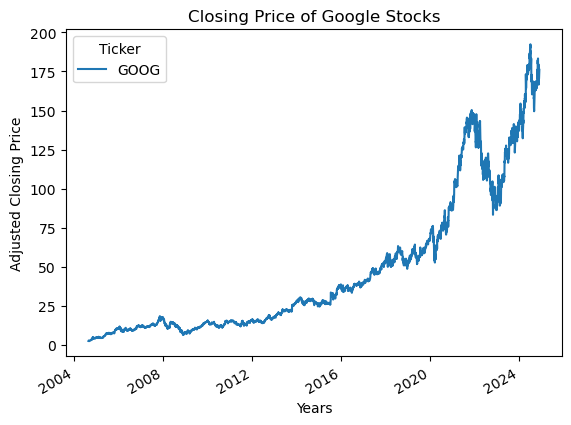

In [22]:
plt.figure(figsize=(15,10))
google_data['Adj Close'].plot()
plt.xlabel("Years")
plt.ylabel("Adjusted Closing Price")
plt.title("Closing Price of Google Stocks")
plt.show()

In [19]:
def plot_graph(figsize,values,column_name):
    plt.figure(figsize = figsize)
    values.plot()
    plt.xlabel("Years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google Stocks")
    plt.show()

In [27]:
for i in range(2004, 2025):
    year_count = list(google_data.index.year).count(i)  
    print(i, year_count)

2004 94
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 234


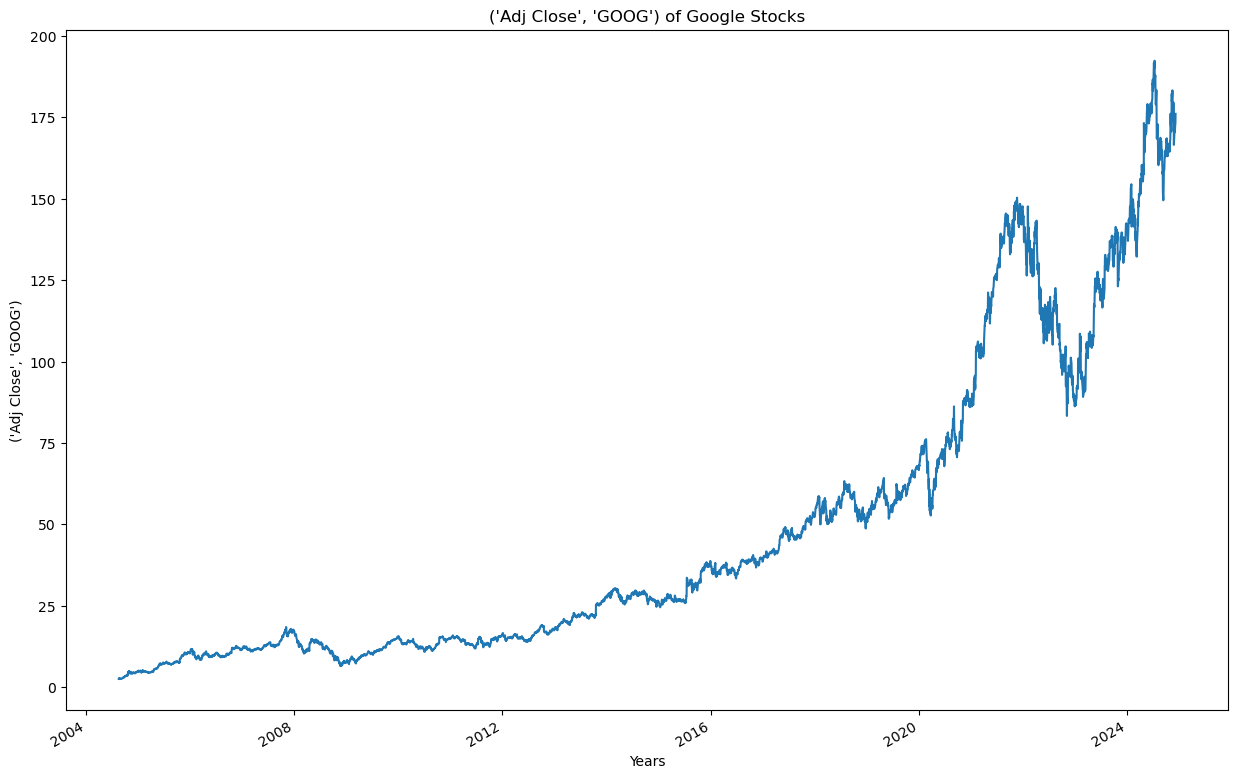

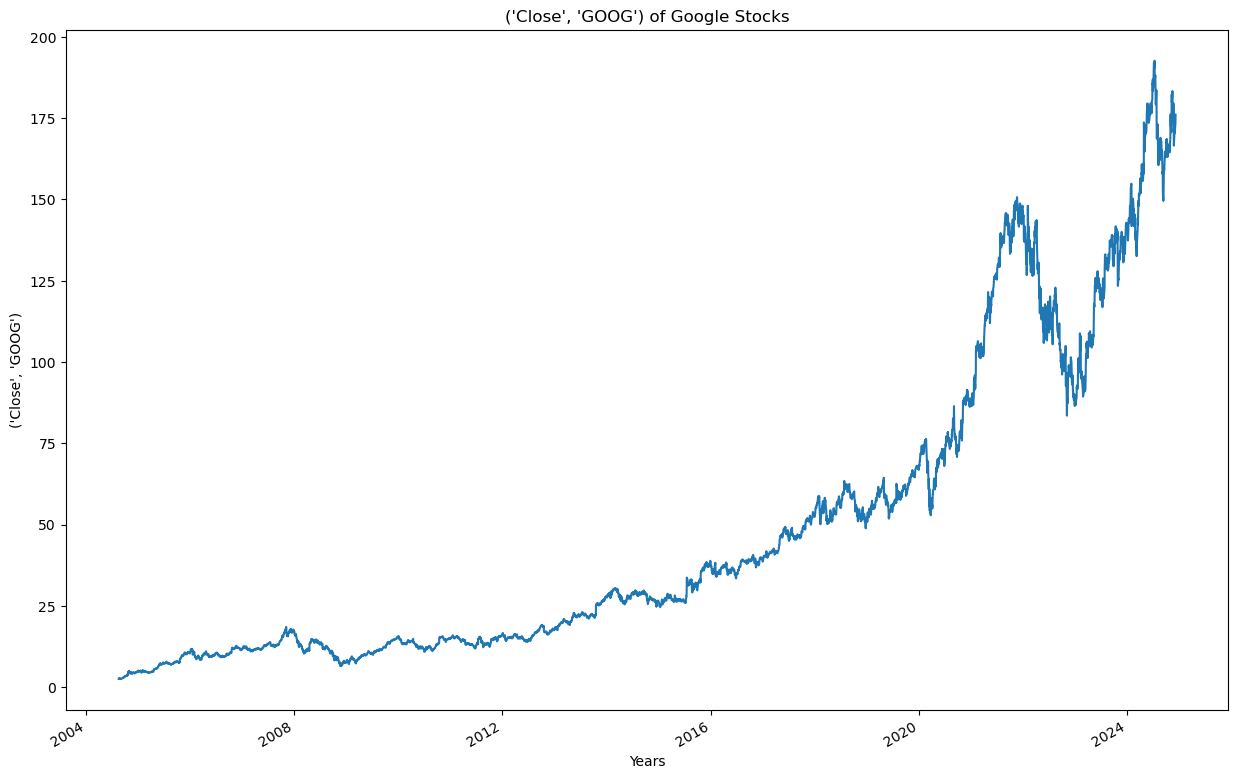

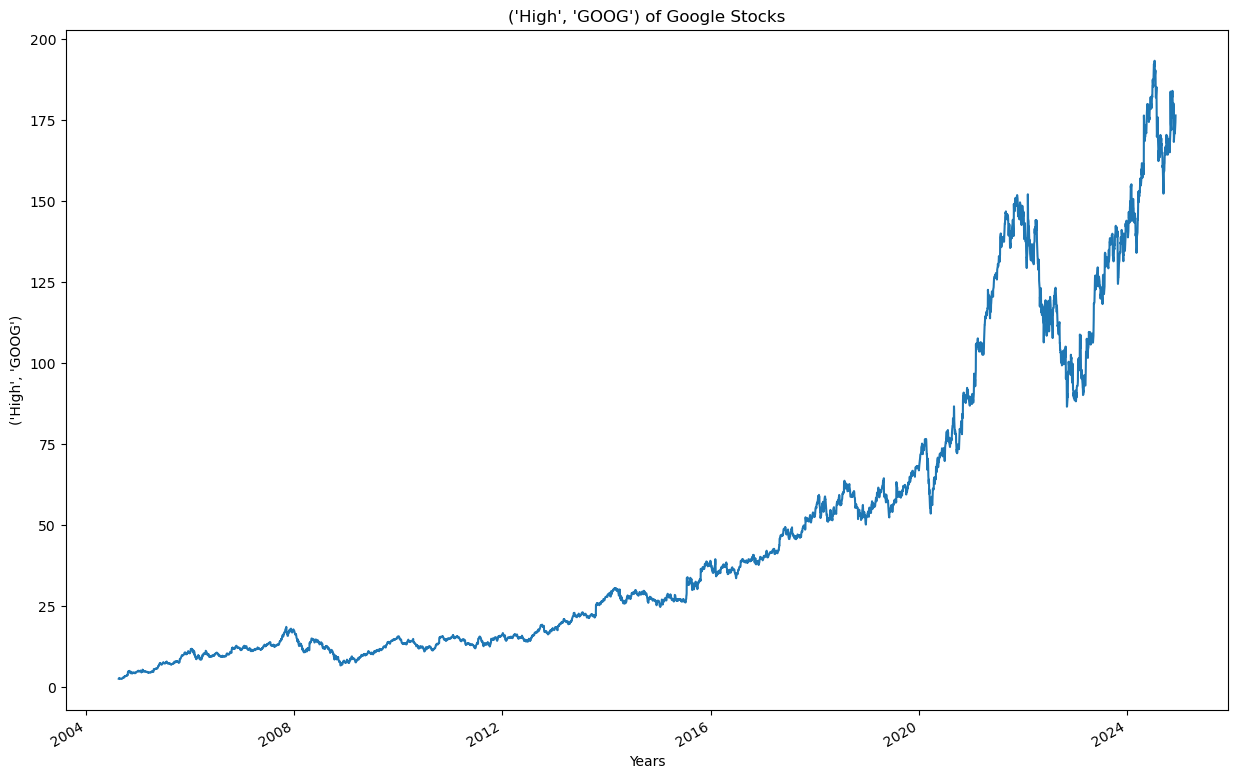

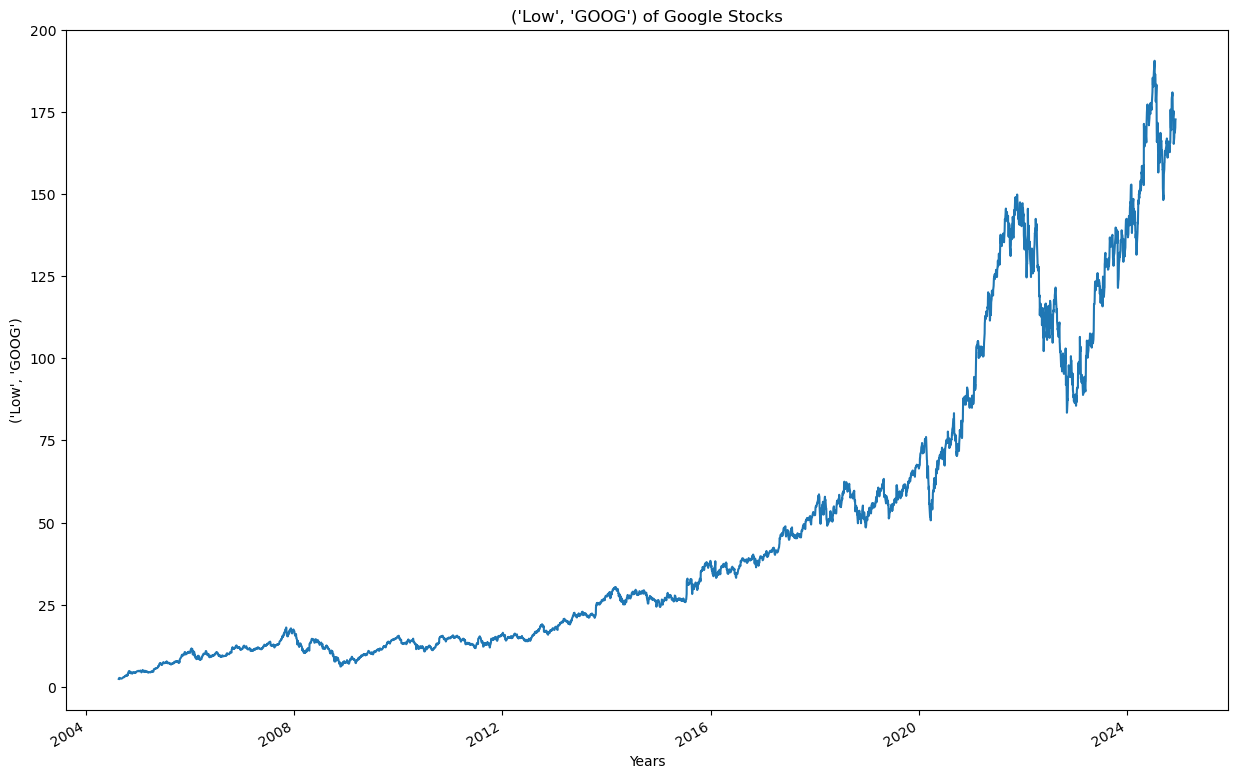

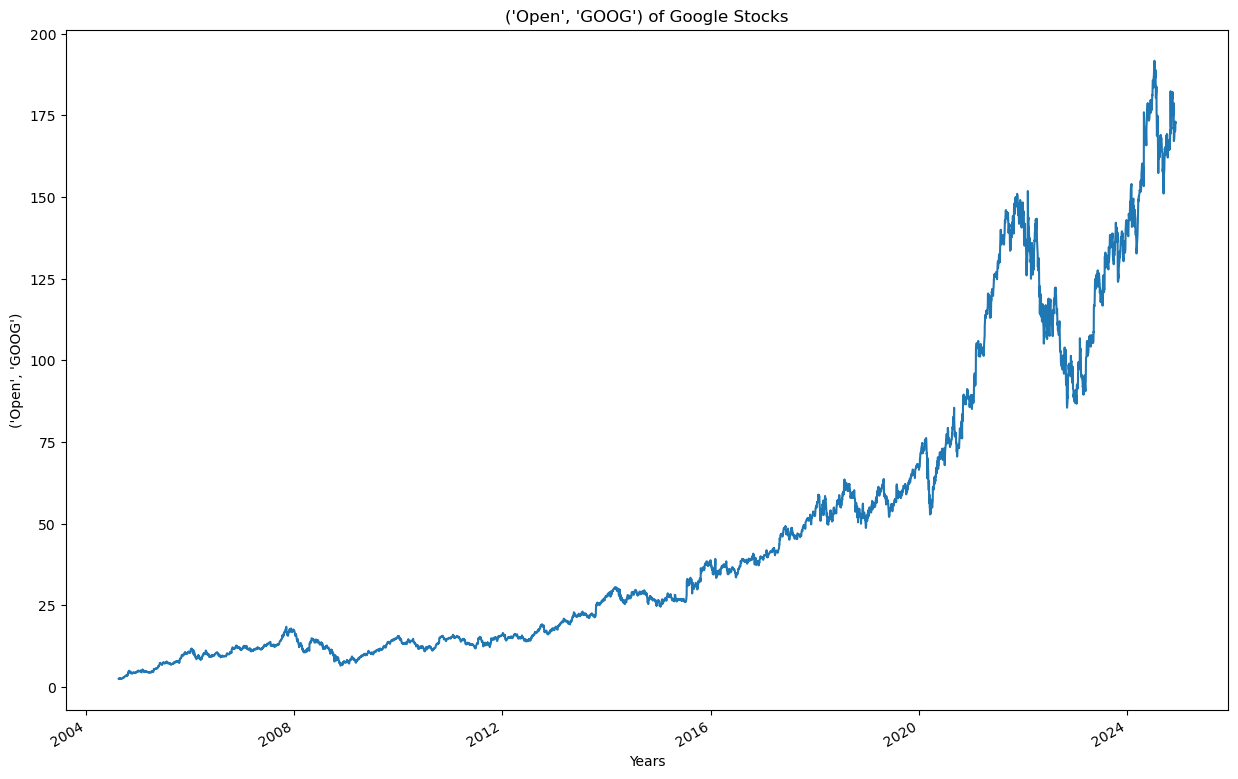

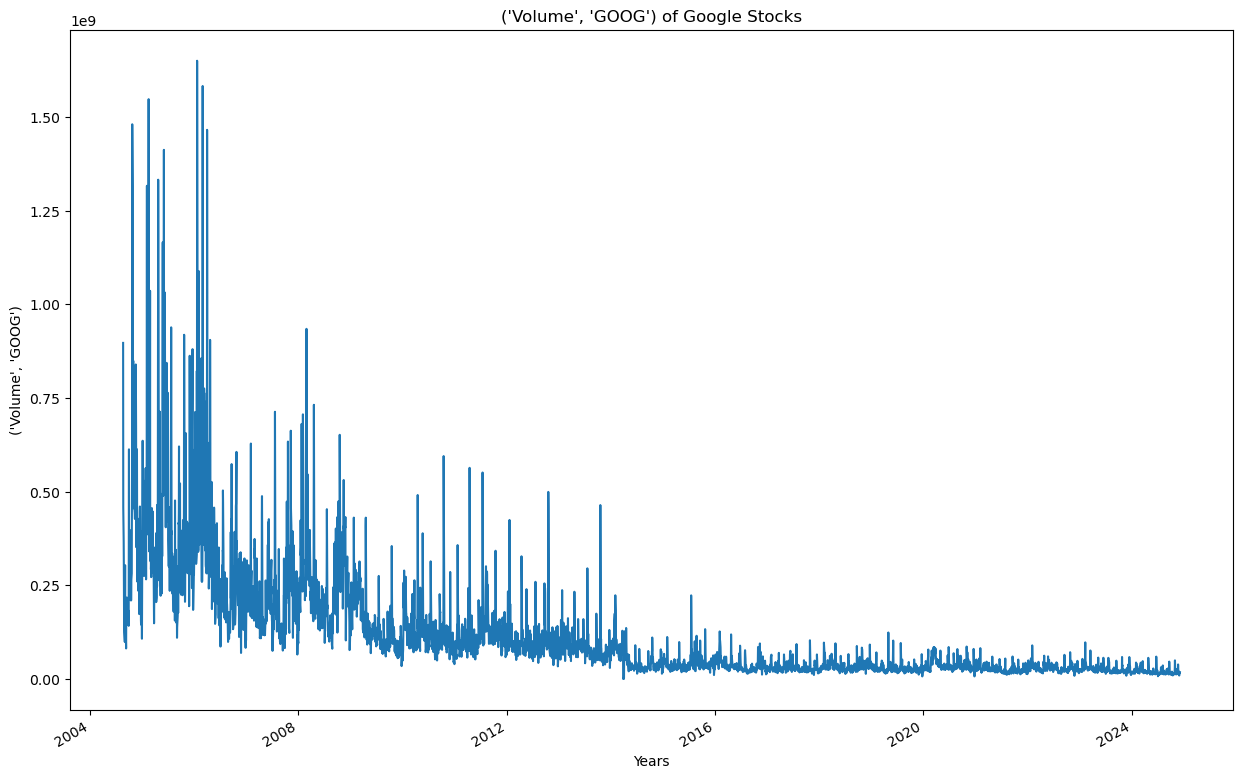

In [21]:
for columns in google_data.columns:
    plot_graph((15,10),google_data[columns],columns)

In [28]:
google_data['Moving_average_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [30]:
google_data['Moving_average_for_250_days'][0:250].tail()

Date
2005-08-09         NaN
2005-08-10         NaN
2005-08-11         NaN
2005-08-12         NaN
2005-08-15    5.021707
Name: Moving_average_for_250_days, dtype: float64

<Figure size 1500x1000 with 0 Axes>

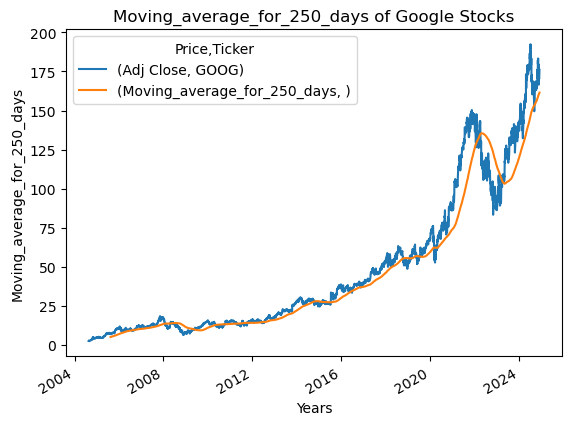

In [33]:
plot_graph((15,10), google_data[['Adj Close','Moving_average_for_250_days']],'Moving_average_for_250_days')

<Figure size 1500x1000 with 0 Axes>

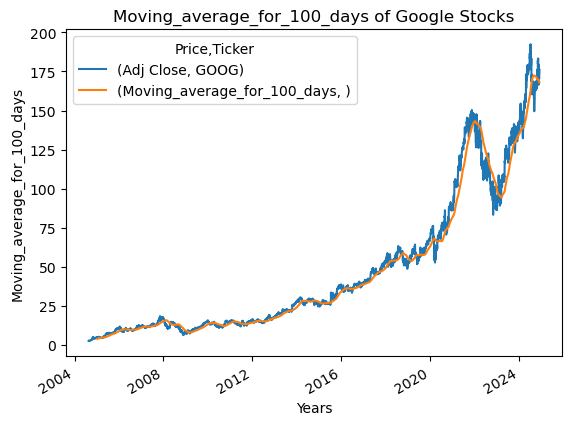

In [34]:
google_data['Moving_average_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,10), google_data[['Adj Close','Moving_average_for_100_days']],'Moving_average_for_100_days')

<Figure size 1500x1000 with 0 Axes>

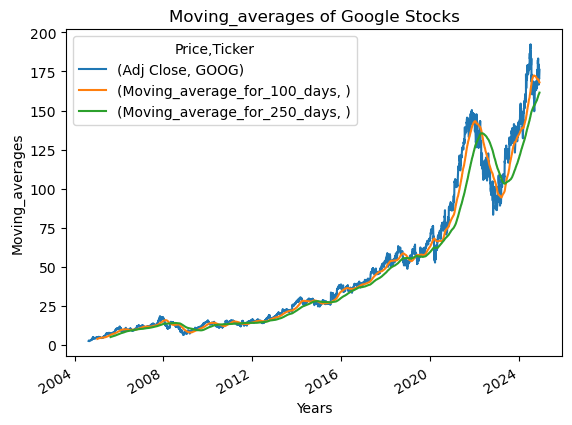

In [35]:
plot_graph((15,10), google_data[['Adj Close','Moving_average_for_100_days','Moving_average_for_250_days']],'Moving_averages')

In [36]:
google_data['Percent Change in Adjusted Closing Price']=google_data['Adj Close'].pct_change()
google_data['Percent Change in Adjusted Closing Price']

Date
2004-08-19         NaN
2004-08-20    0.079430
2004-08-23    0.010064
2004-08-24   -0.041408
2004-08-25    0.010775
                ...   
2024-11-27    0.001172
2024-11-29   -0.001932
2024-12-02    0.014605
2024-12-03    0.000231
2024-12-04    0.017744
Name: Percent Change in Adjusted Closing Price, Length: 5109, dtype: float64

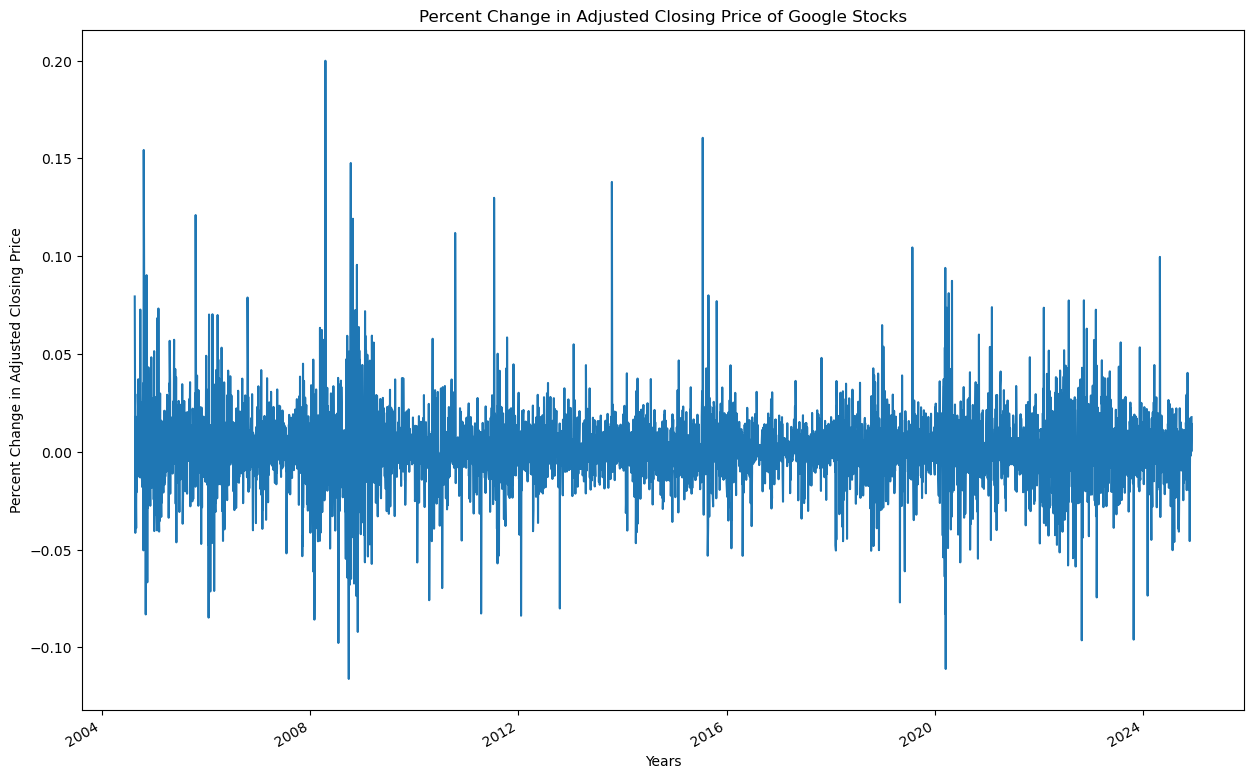

In [37]:
plot_graph((15,10), google_data['Percent Change in Adjusted Closing Price'],'Percent Change in Adjusted Closing Price')

In [38]:
acp = google_data[['Adj Close']]

In [39]:
max(acp.values),min(acp.values)

(array([192.40672302]), array([2.48481059]))

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(acp)
scaled_data

array([[4.31765272e-05],
       [1.08581296e-03],
       [1.22840697e-03],
       ...,
       [8.97712028e-01],
       [8.97922686e-01],
       [9.14087182e-01]])

In [41]:
import numpy as np
x_data = []
y_data = []
for i in range(100,len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])


x_data , y_data = np.array(x_data),np.array(y_data)

In [42]:
x_data[0],y_data[0]

(array([[4.31765272e-05],
        [1.08581296e-03],
        [1.22840697e-03],
        [6.35791121e-04],
        [7.83614926e-04],
        [1.03348241e-03],
        [8.03238566e-04],
        [2.61643930e-04],
        [3.08738406e-04],
        [3.14000836e-05],
        [1.96231378e-04],
        [0.00000000e+00],
        [2.05390416e-04],
        [2.99584390e-04],
        [3.00889954e-04],
        [6.95966350e-04],
        [9.79845049e-04],
        [1.50182107e-03],
        [1.56853667e-03],
        [1.82625261e-03],
        [2.28674156e-03],
        [2.53137549e-03],
        [2.33252796e-03],
        [2.40316779e-03],
        [2.72237331e-03],
        [2.59286005e-03],
        [2.38747465e-03],
        [3.51252736e-03],
        [4.06458911e-03],
        [3.87097262e-03],
        [4.26081923e-03],
        [4.58525077e-03],
        [5.01826512e-03],
        [4.84950960e-03],
        [5.08105775e-03],
        [4.93454202e-03],
        [4.61141730e-03],
        [4.89137177e-03],
        [5.3

In [43]:
int(len(x_data)*0.7)

3506

In [45]:
int(len(x_data)*0.3)-100

1402

In [46]:
splitting_length = int(len(x_data)*0.7)
x_train = x_data[:splitting_length]
y_train = y_data[:splitting_length]




x_test = x_data[splitting_length:]
y_test = y_data[splitting_length:]

In [47]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

2024-12-05 17:34:04.563121: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [49]:
model = Sequential()
model.add(LSTM(128,return_sequences = True , input_shape = (x_train.shape[1],1)))
model.add(LSTM(64 ,return_sequences = False ))
model.add(Dense(25))
model.add(Dense(1))

In [52]:
model.compile(optimizer = 'adam' , loss = 'mse')

In [55]:
model.fit(x_train,y_train,batch_size = 1 , epochs = 2)

Epoch 1/2
3506/3506 ━━━━━━━━━━━━━━━━━━━━ 157s 45ms/step - loss: 1.2813e-04
Epoch 2/2
3506/3506 ━━━━━━━━━━━━━━━━━━━━ 169s 48ms/step - loss: 2.8293e-05


In [56]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [57]:
predict = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step


In [58]:
predict

array([[0.2667817 ],
       [0.26176712],
       [0.25553256],
       ...,
       [0.7795064 ],
       [0.7893584 ],
       [0.788614  ]], dtype=float32)

In [59]:
inv_pred = scaler.inverse_transform(predict)
inv_pred

array([[ 53.1525  ],
       [ 52.200123],
       [ 51.016045],
       ...,
       [150.53015 ],
       [152.40126 ],
       [152.25989 ]], dtype=float32)

In [60]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 51.97735214],
       [ 50.70198441],
       [ 51.30949402],
       ...,
       [172.97999573],
       [173.02000427],
       [176.08999634]])

In [61]:
rmse = np.sqrt(np.mean((inv_pred-inv_y_test)**2))
rmse

9.71340984034419

In [65]:
import pandas as pd
plot_data = pd.DataFrame(
    {

        'original_data': inv_y_test.reshape(-1),
        'predictions': inv_pred.reshape(-1)
    },index = google_data.index[splitting_length+100:]    
)
plot_data

,original_data,predictions
Date,,
2018-12-14,51.977352,53.152500
2018-12-17,50.701984,52.200123
2018-12-18,51.309494,51.016045
2018-12-19,51.025192,51.661396
2018-12-20,50.346859,51.357578
...,...,...
2024-11-27,170.820007,150.676880
2024-11-29,170.490005,150.817917
2024-12-02,172.979996,150.530151


<Figure size 2000x2000 with 0 Axes>

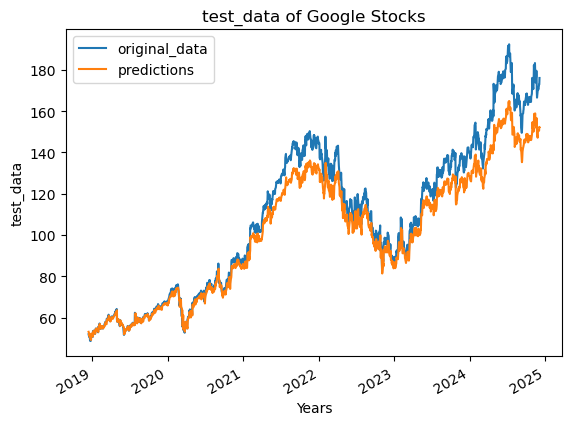

In [69]:
plot_graph((20,20),plot_data,'Test data')

<Figure size 2000x2000 with 0 Axes>

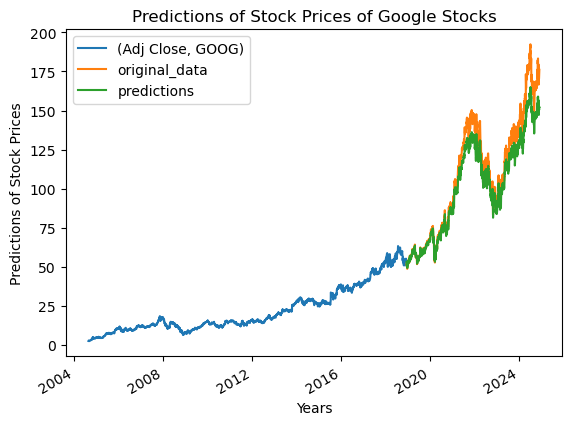

In [71]:
plot_graph((20,20),pd.concat([acp[:splitting_length+100],plot_data],axis = 0),'Predictions of Stock Prices')